# Example notebook for Ensemble of 2D (lon-lat) diagnostic 2-meter temperature 

##### This notebook demonsterates how the ensemble module can be used for 2D (lon-lat) 2 meter temperature data from a single ensemble or multi-model ensemble memebers

In [1]:
import sys
import xarray as xr
from aqua.diagnostics import EnsembleLatLon

In [2]:
# The individual ensemble memebers datasets has to be merged in a Dataset before using the EnsembleLatLon class
def merge_dataset(var=None, models_list= None, ens_dim="Ensembles"):
    dataset_list = []
    if models_list is None:
        raise NoDataError("No models provided")
    else:
        for i, data in enumerate(models_list):
            dataset_list.append(data)
    merged_dataset = xr.concat(dataset_list, ens_dim)
    del data
    del dataset_list
    #gc.collect()
    return merged_dataset

In [3]:
# data paths on lumi
# IFS-NEMO: /pfs/lustrep3/projappl/project_465000454/jvonhar/aqua-analysis/output/precomputed_aqua_analysis/IFS-NEMO/historical-1990/atmglobalmean/netcdf/atmglobalmean.statistics_maps.2t.IFS-NEMO_historical-1990.nc
# IFS-FESOM: /pfs/lustrep3/projappl/project_465000454/jvonhar/aqua-analysis/output/precomputed_aqua_analysis/IFS-FESOM/historical-1990/atmglobalmean/netcdf/atmglobalmean.statistics_maps.2t.IFS-FESOM_historical-1990.nc 

In [4]:
# loading the data as xarray Datasets

# loading the atmglobalmean Datasets 
IFS_NEMO_data = xr.open_dataset('/work/ab0995/a270260/pre_computed_aqua_analysis/IFS-NEMO/historical-1990/atmglobalmean/netcdf/atmglobalmean.statistics_maps.2t.IFS-NEMO_historical-1990.nc')
IFS_FESOM_data = xr.open_dataset('/work/ab0995/a270260/pre_computed_aqua_analysis/IFS-FESOM/historical-1990/atmglobalmean/netcdf/atmglobalmean.statistics_maps.2t.IFS-FESOM_historical-1990.nc')
model_list = [IFS_NEMO_data, IFS_FESOM_data]

In [5]:
plot_options = {'figure_size': [15,14], 'cbar_label': '2-meter temperature in K','mean_plot_title': 'Map of 2t for Ensemble Multi-Model mean', 'std_plot_title': 'Map of 2t for Ensemble Multi-Model standard deviation'}

In [6]:
atm_dataset = merge_dataset(var='2t',models_list=model_list)

In [7]:
atmglobalmean_ens = EnsembleLatLon(var='2t', dataset=atm_dataset, plot_options=plot_options)

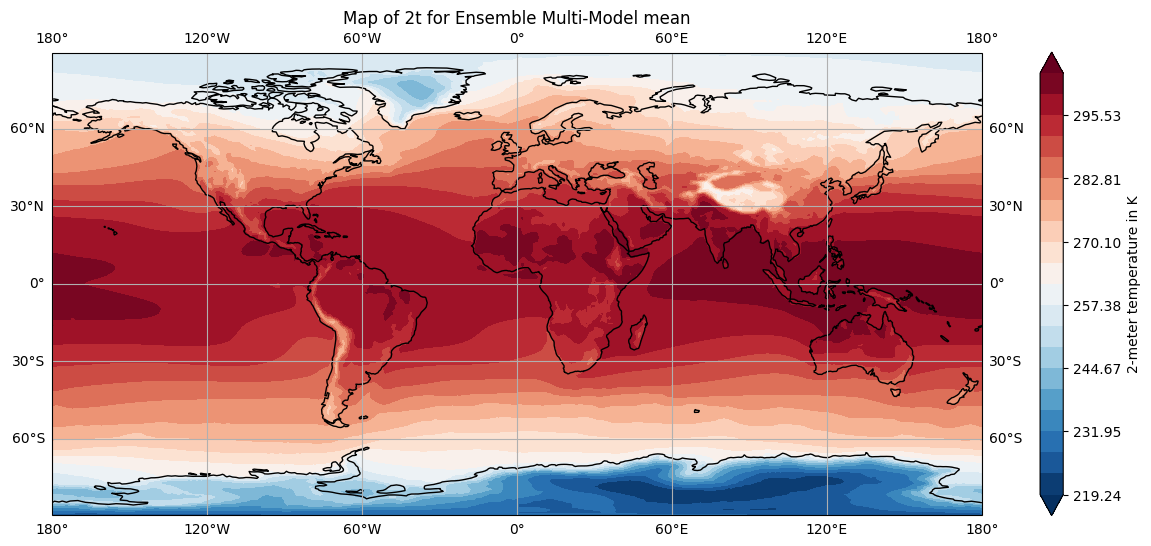

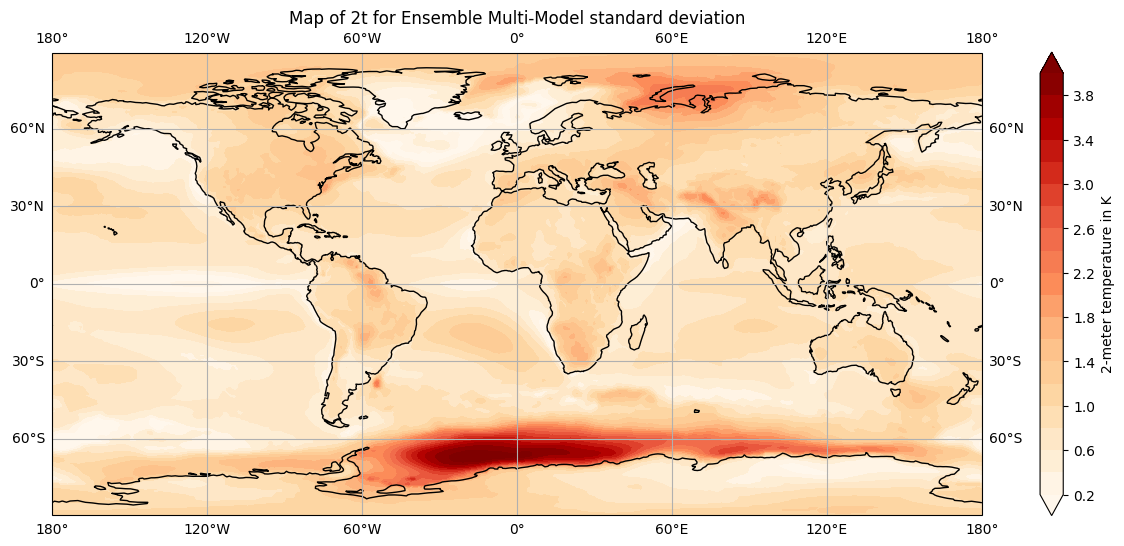

In [8]:
atmglobalmean_ens.run()

In [9]:
atmglobalmean_ens.dataset_std

<xarray.Dataset> Size: 524kB
Dimensions:  (lat: 180, lon: 361)
Coordinates:
  * lon      (lon) float64 3kB 0.0 1.0 2.0 3.0 4.0 ... 357.0 358.0 359.0 360.0
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Data variables:
    2t       (lat, lon) float64 520kB 1.064 1.034 1.034 ... 1.336 1.336 1.344
Attributes: (12/21)
    GRIB_paramId:                    167
    long_name:                       2 metre temperature
    GRIB_stepUnits:                  1
    GRIB_gridDefinitionDescription:  150
    GRIB_typeOfLevel:                heightAboveGround
    standard_name:                   air_temperature
    ...                              ...
    GRIB_NV:                         0
    gridtype:                        healpix
    GRIB_shortName:                  2t
    GRIB_units:                      K
    GRIB_dataType:                   fc
    model_label:                     IFS-NEMO_historical-1990